<a href="https://colab.research.google.com/github/deanhadzi/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module1-afirstlookatdata/LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
# TODO - we'll be doing this live, taking requests
# and reproducing what it is to look up and learn things

In [0]:
# Cleaning up the lecture notebook with my annotations
# Importing all necessary modules to run this notebook properly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
!wget https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv

--2019-07-10 23:29:39--  https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4384 (4.3K) [text/plain]
Saving to: ‘drinks.csv.3’

drinks.csv.3        100%[===================>]   4.28K  --.-KB/s    in 0s      

2019-07-10 23:29:39 (69.6 MB/s) - ‘drinks.csv.3’ saved [4384/4384]



In [4]:
!ls

drinks.csv    drinks.csv.2  interactive_bokeh_plot.html
drinks.csv.1  drinks.csv.3  sample_data


In [5]:
drinks2 = pd.read_csv('drinks.csv')
print(drinks2.shape)

(193, 5)


In [6]:
drinks = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv')
print(drinks.shape)
drinks.head()

# Importing alcohol consumption csv file from 538.com to this notebook
# Checking the shape of data and printing the first five lines

(193, 5)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [7]:
drinks.columns

# This command will allow us to see all the column names in a dataset

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [8]:
drinks.sort_values('beer_servings', ascending=False).head(10)

# .sort_values() will sort the values within a column

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
117,Namibia,376,3,1,6.8
45,Czech Republic,361,170,134,11.8
62,Gabon,347,98,59,8.9
65,Germany,346,117,175,11.3
98,Lithuania,343,244,56,12.9
135,Poland,343,215,56,10.9
188,Venezuela,333,100,3,7.7
81,Ireland,313,118,165,11.4
129,Palau,306,63,23,6.9
140,Romania,297,122,167,10.4


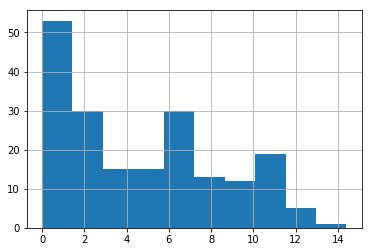

In [9]:
drinks.total_litres_of_pure_alcohol.hist()
plt.show()

# Creating the histogram for purposes of bucketing the values from total alcohol conusmption feature.

In [10]:
drinks['drinks_alcohol'] = np.where(drinks['total_litres_of_pure_alcohol'] > 9, 'high',
                           np.where(drinks['total_litres_of_pure_alcohol'] >= 6, 'medium',
                           np.where(drinks['total_litres_of_pure_alcohol'] == 0, 'none', 'low')))  
drinks.head()

# Creating the new feature within our dataset by using the np.where function
# Using np.where to check for the condition and then output a result based on that condition
# There can be up to 2 possible results

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol
0,Afghanistan,0,0,0,0.0,none
1,Albania,89,132,54,4.9,low
2,Algeria,25,0,14,0.7,low
3,Andorra,245,138,312,12.4,high
4,Angola,217,57,45,5.9,low


In [11]:
drinks.drinks_alcohol.value_counts()

# Checking how many countries are in each of the new categories using .value_counts() 

low       105
medium     41
high       34
none       13
Name: drinks_alcohol, dtype: int64

In [12]:
countries = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')
print(countries.shape)
countries.head()

# Importing 2nd csv to expand on our first dataset

(249, 11)


,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [13]:
countries[['name', 'region', 'sub-region']].head()

# Indexes just the columns we need from the countries dataset

,name,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia


In [14]:
df = drinks.join(countries[['name', 'region', 'sub-region']], how='left')
print(df.shape)
df.head(20)

# .join will connect the two dataframes
# Always check the data after joining to make sure that files connected properly

(193, 9)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
0,Afghanistan,0,0,0,0.0,none,Afghanistan,Asia,Southern Asia
1,Albania,89,132,54,4.9,low,Åland Islands,Europe,Northern Europe
2,Algeria,25,0,14,0.7,low,Albania,Europe,Southern Europe
3,Andorra,245,138,312,12.4,high,Algeria,Africa,Northern Africa
4,Angola,217,57,45,5.9,low,American Samoa,Oceania,Polynesia
5,Antigua & Barbuda,102,128,45,4.9,low,Andorra,Europe,Southern Europe
6,Argentina,193,25,221,8.3,medium,Angola,Africa,Sub-Saharan Africa
7,Armenia,21,179,11,3.8,low,Anguilla,Americas,Latin America and the Caribbean
8,Australia,261,72,212,10.4,high,Antarctica,NaN,NaN
9,Austria,279,75,191,9.7,high,Antigua and Barbuda,Americas,Latin America and the Caribbean


In [0]:
drinks.at[5, 'country'] = 'Antigua and Barbuda'
drinks.at[20, 'country'] = 'Bolivia (Plurinational State of)'
drinks.at[21, 'country'] = 'Bosnia and Herzegovina'
drinks.at[24, 'country'] = 'Brunei Darussalam'
drinks.at[28, 'country'] = "Côte d'Ivoire"
drinks.at[45, 'country'] = "Czechia"
drinks.at[46, 'country'] = "Korea (Democratic People's Republic of)"
drinks.at[47, 'country'] = "Congo, Democratic Republic of the"
drinks.at[79, 'country'] = "Iran (Islamic Republic of)"
drinks.at[92, 'country'] = "Lao People's Democratic Republic"
drinks.at[110, 'country'] = "Micronesia (Federated States of)"
drinks.at[138, 'country'] = "Korea, Republic of"
drinks.at[139, 'country'] = "Moldova, Republic of"
drinks.at[170, 'country'] = "North Macedonia"
drinks.at[182, 'country'] = "United Kingdom of Great Britain and Northern Ireland"
drinks.at[184, 'country'] = 'United States of America'

# Correcting the items in drinks dataset so we have a better merge.
# I left 10 items unchanged for the purpose of illustrating how to use na function later on.

In [16]:
df = pd.merge(drinks, countries[['name', 'region', 'sub-region']], how='left', left_on='country', right_on='name')
print(df.shape)
df.head(20)

# .merge will allow us to specify what columns to use in joining the datasets

(193, 9)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
0,Afghanistan,0,0,0,0.0,none,Afghanistan,Asia,Southern Asia
1,Albania,89,132,54,4.9,low,Albania,Europe,Southern Europe
2,Algeria,25,0,14,0.7,low,Algeria,Africa,Northern Africa
3,Andorra,245,138,312,12.4,high,Andorra,Europe,Southern Europe
4,Angola,217,57,45,5.9,low,Angola,Africa,Sub-Saharan Africa
5,Antigua and Barbuda,102,128,45,4.9,low,Antigua and Barbuda,Americas,Latin America and the Caribbean
6,Argentina,193,25,221,8.3,medium,Argentina,Americas,Latin America and the Caribbean
7,Armenia,21,179,11,3.8,low,Armenia,Asia,Western Asia
8,Australia,261,72,212,10.4,high,Australia,Oceania,Australia and New Zealand
9,Austria,279,75,191,9.7,high,Austria,Europe,Western Europe


In [17]:
df.info()

# A quick way to assess your dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 9 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
drinks_alcohol                  193 non-null object
name                            183 non-null object
region                          183 non-null object
sub-region                      183 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 15.1+ KB


In [18]:
df.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
drinks_alcohol                   0
name                            10
region                          10
sub-region                      10
dtype: int64

In [19]:
drinks.iloc[184]

# .iloc[] - integer location - displays all the info about that index item

country                         United States of America
beer_servings                                        249
spirit_servings                                      158
wine_servings                                         84
total_litres_of_pure_alcohol                         8.7
drinks_alcohol                                    medium
Name: 184, dtype: object

In [20]:
df[df.region.isna()]

# Displaying the data with missing info

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
143,St. Kitts & Nevis,194,205,32,7.7,medium,NaN,NaN,NaN
144,St. Lucia,171,315,71,10.1,high,NaN,NaN,NaN
145,St. Vincent & the Grenadines,120,221,11,6.3,medium,NaN,NaN,NaN
148,Sao Tome & Principe,56,38,140,4.2,low,NaN,NaN,NaN
164,Swaziland,90,2,2,4.7,low,NaN,NaN,NaN
167,Syria,5,35,16,1.0,low,NaN,NaN,NaN
174,Trinidad & Tobago,197,156,7,6.4,medium,NaN,NaN,NaN
183,Tanzania,36,6,1,5.7,low,NaN,NaN,NaN
188,Venezuela,333,100,3,7.7,medium,NaN,NaN,NaN
189,Vietnam,111,2,1,2.0,low,NaN,NaN,NaN


In [21]:
df.region.value_counts()

# This function doesn't count the NaN values!!!

Africa      50
Asia        45
Europe      42
Americas    30
Oceania     16
Name: region, dtype: int64

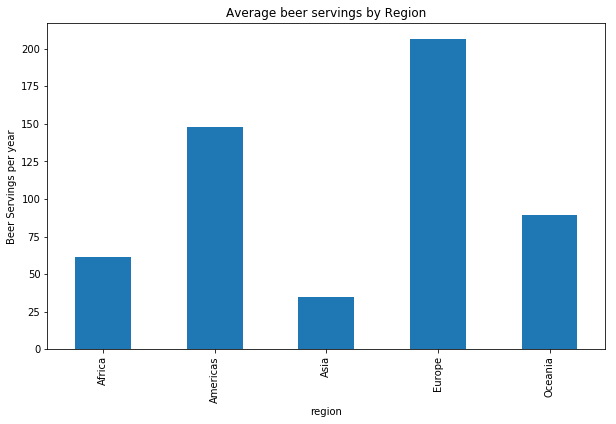

In [22]:
df.groupby('region').beer_servings.mean().plot(kind='bar', figsize=(10, 6))
plt.title('Average beer servings by Region')
plt.ylabel('Beer Servings per year')
plt.show()

# .groupby() will group the items based on the column.
# .plot() will create plot within Pandas

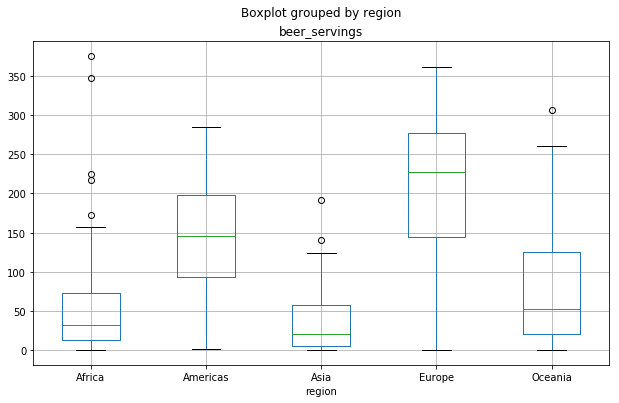

In [23]:
df.boxplot(column='beer_servings', by='region', figsize=(10,6))
plt.show()

# .boxplot will create a box plot within Pandas.

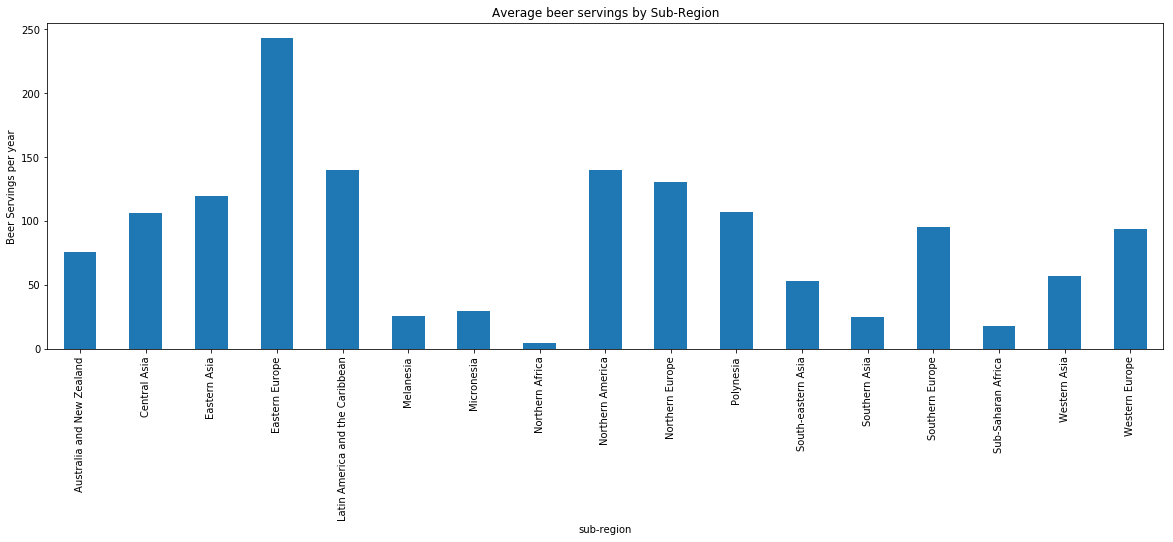

In [24]:
df.groupby('sub-region').spirit_servings.mean().plot(kind='bar', figsize=(20,6))
plt.title('Average beer servings by Sub-Region')
plt.ylabel('Beer Servings per year')
plt.show()

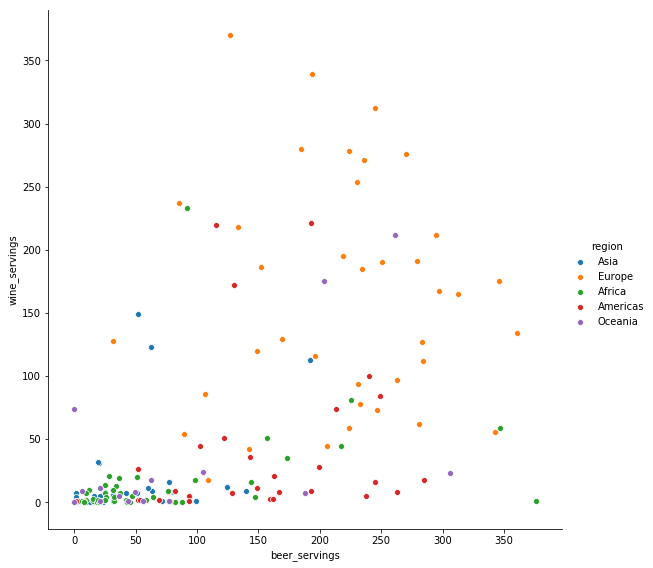

In [25]:
sns.pairplot(x_vars=['beer_servings'], y_vars=['wine_servings'], data=df, hue='region', height=8)
plt.show()

In [26]:
df = df.dropna(subset=['region'])
df.shape

# Dropping the NaN items from the Region column.>>

(183, 9)

In [27]:
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.palettes import d3
from bokeh.plotting import figure
from bokeh.transform import transform
output_notebook()
x = df.beer_servings.values
y = df.wine_servings.values
country = df.country
region = df.region
source = ColumnDataSource(data=dict(x=x, y=y, country=country, region=region))
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("(x,y)", "(@x, @y)"),
    ('country', '@country'),
])
palette = d3['Category10'][len(df['region'].unique())]
mapper = CategoricalColorMapper(factors = df['region'].unique(), palette = palette)
# create figure and plot
p = figure(plot_width=600, plot_height=600, 
           tools=[hover, "wheel_zoom", "box_zoom", "reset"], 
           title="Beer and Wine Servings per Year by Country")
# create plot
p.scatter(x='x', y='y', size=10, alpha=0.8,
          color={'field': 'region', 'transform': mapper},
          legend='region', 
          source=source)
# add axis labels
p.xaxis.axis_label = "Beer Servings"
p.yaxis.axis_label = "Wine Servings"
output_file('interactive_bokeh_plot.html')
show(p)

Loading BokehJS ...

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [28]:
# TODO - your code here
# Use what we did live in lecture as an example

import datetime
from datetime import date

# I will need this module to calculate the age of the athletes

hw = pd.read_csv('https://raw.githubusercontent.com/deanhadzi/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module1-afirstlookatdata/athletes.csv')
print(hw.shape)
hw.head()

# Importing data from source: https://www.kaggle.com/rio2016/olympic-games#athletes.csv
# This dataset contain all the participants at the 2016 Rio Olympics

(11538, 11)


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [29]:
hw.info()

# Checking the data types in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
id             11538 non-null int64
name           11538 non-null object
nationality    11538 non-null object
sex            11538 non-null object
dob            11537 non-null object
height         11208 non-null float64
weight         10879 non-null float64
sport          11538 non-null object
gold           11538 non-null int64
silver         11538 non-null int64
bronze         11538 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 991.6+ KB


In [30]:
hw.isna().sum()

# Checking for missing values in data frame

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [0]:
hw.dob = pd.to_datetime(hw.dob, format= '%m/%d/%y')

# Changing the dob feature from object to date.

In [32]:
hw = hw.dropna(subset=['dob'])
print(hw.shape)

# Dropping an instance with missing DOB. This was messing my function later on
# so I decided to drop it instead to replace it. 
# It would take me much longer to figure out how to find mean age than what I did in this exercise.

(11537, 11)


In [0]:
def age(birth_date):
    days_in_year = 365.2425
    age = int((date(2016, 8, 5) - birth_date.date()).days / days_in_year)
    return age

# Function to calculate the age of the athletes on the first day of the Olympics.

In [0]:
hw['age'] = hw.dob.map(age)

# Adding the age feature to the data frame.

In [35]:
hw = hw[hw['age']>=12]
print(hw.shape)
hw.head()

# I figured out that some of the dob to age conversion yielded wrong results
# To save time I dropped those from the dataframe.

(11472, 12)


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,46
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,29
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,24
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,25
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,25


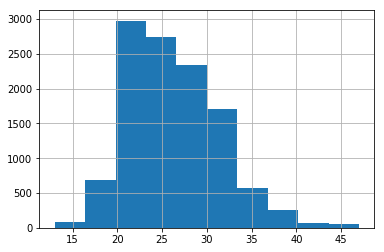

In [36]:
hw.age.hist()
plt.show()

# Checking the age distribution.

In [37]:
hw['age_decade'] = np.where(hw['age'] < 20, 'teen',
                   np.where(hw['age'] < 30, '20s',
                   np.where(hw['age'] < 40, '30s',
                   np.where(hw['age'] < 50, '40s', 'none'))))

hw['medal'] = (hw['gold']+hw['silver']+hw['bronze'])
hw.head()

# Adding the age decade and total medal count as features

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age,age_decade,medal
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,46,40s,0
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,29,20s,0
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,24,20s,1
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,25,20s,0
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,25,20s,0


In [38]:
hw = hw[hw['medal']>0]
print(hw.shape)
hw.head()

# Dropping all the people who didn't win any medals. Better luck in the next Olympics!

(1843, 14)


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age,age_decade,medal
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,24,20s,1
6,266237702,Aaron Russell,USA,male,1993-06-04,2.05,98.0,volleyball,0,0,1,23,20s,1
14,162792594,Abbey Weitzeil,USA,female,1996-12-03,1.78,68.0,aquatics,1,1,0,19,teen,2
48,962468808,Abdoulrazak Issoufou Alfaga,NIG,male,1994-12-26,2.07,98.0,taekwondo,0,1,0,21,20s,1
57,153457,Abdullahi Shehu,NGR,male,1993-03-12,1.70,NaN,football,0,0,1,23,20s,1


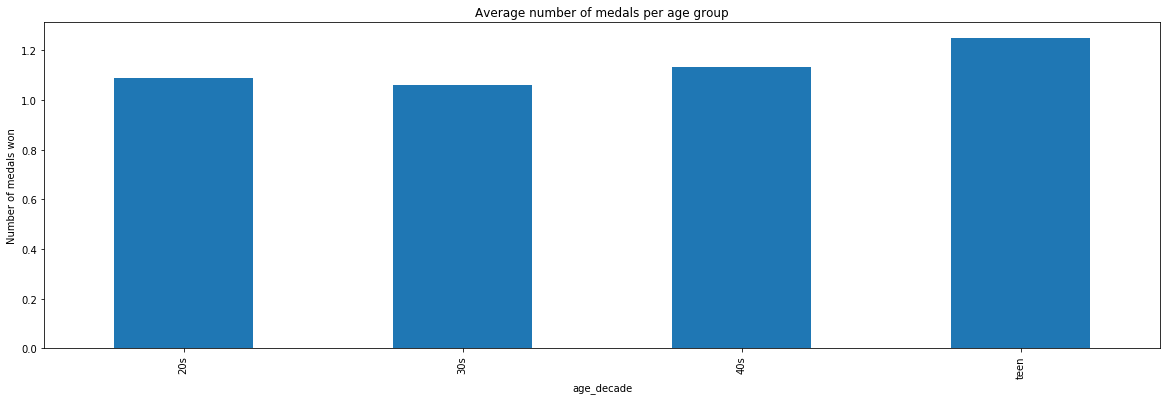

In [39]:
hw.groupby('age_decade').medal.mean().plot(kind='bar', figsize=(20,6))
plt.title('Average number of medals per age group')
plt.ylabel('Number of medals won')
plt.show()

# Doing a bar plot to see what is the average number of medals won based on age.
# It seems that teens are leading, followed by people in their 40s, then 20s, then 30s.
# It would be fun to see what caused this based on the sport but I'm running out of time.

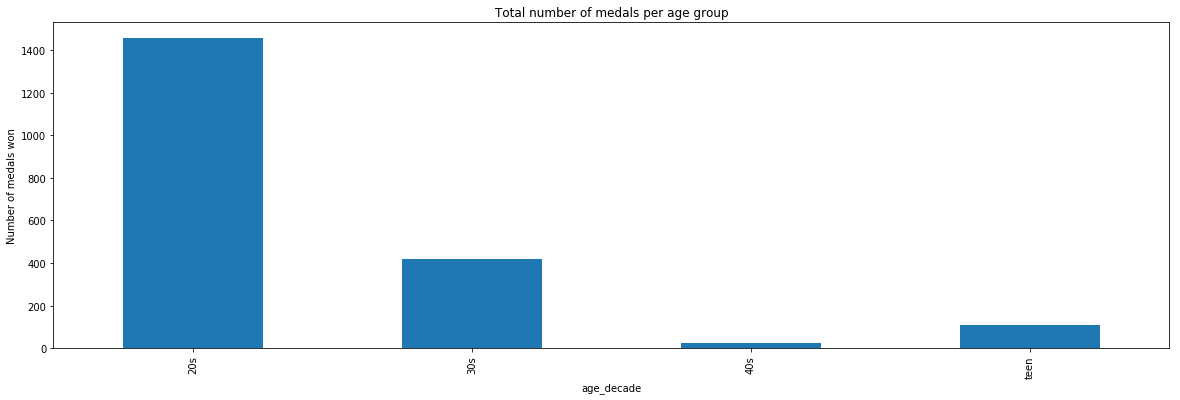

In [53]:
hw.groupby('age_decade').medal.sum().plot(kind='bar', figsize=(20,6))
plt.title('Total number of medals per age group')
plt.ylabel('Number of medals won')
plt.show()

# Total number of medals won by the age group.

In [41]:
countries[['alpha-3', 'region', 'sub-region']].head()

# Using the CSV from yesterday's lecture to attacht region and sub-region to my data.

,alpha-3,region,sub-region
0,AFG,Asia,Southern Asia
1,ALA,Europe,Northern Europe
2,ALB,Europe,Southern Europe
3,DZA,Africa,Northern Africa
4,ASM,Oceania,Polynesia


In [42]:
df_hw = pd.merge(hw, countries[['alpha-3', 'region', 'sub-region']], how='left', left_on='nationality', right_on='alpha-3')
print(df_hw.shape)
df_hw.head()

# Merging the medal winners with Country CSV.

(1843, 17)


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age,age_decade,medal,alpha-3,region,sub-region
0,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,24,20s,1,CAN,Americas,Northern America
1,266237702,Aaron Russell,USA,male,1993-06-04,2.05,98.0,volleyball,0,0,1,23,20s,1,USA,Americas,Northern America
2,162792594,Abbey Weitzeil,USA,female,1996-12-03,1.78,68.0,aquatics,1,1,0,19,teen,2,USA,Americas,Northern America
3,962468808,Abdoulrazak Issoufou Alfaga,NIG,male,1994-12-26,2.07,98.0,taekwondo,0,1,0,21,20s,1,NaN,NaN,NaN
4,153457,Abdullahi Shehu,NGR,male,1993-03-12,1.70,NaN,football,0,0,1,23,20s,1,NaN,NaN,NaN


In [43]:
cleanup = df_hw[df_hw.region.isna()]
print(cleanup.shape)
cleanup.head()

# Removing the data which didn't properly merge so we can clean it up. 

(382, 17)


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age,age_decade,medal,alpha-3,region,sub-region
3,962468808,Abdoulrazak Issoufou Alfaga,NIG,male,1994-12-26,2.07,98.0,taekwondo,0,1,0,21,20s,1,NaN,NaN,NaN
4,153457,Abdullahi Shehu,NGR,male,1993-03-12,1.70,NaN,football,0,0,1,23,20s,1,NaN,NaN,NaN
32,583622968,Alexander Brouwer,NED,male,1989-11-03,1.98,90.0,volleyball,0,0,1,26,20s,1,NaN,NaN,NaN
41,125810149,Alexandra Popp,GER,female,1991-04-06,1.74,65.0,football,1,0,0,25,20s,1,NaN,NaN,NaN
63,712627786,Almuth Schult,GER,female,1991-02-09,1.80,71.0,football,1,0,0,25,20s,1,NaN,NaN,NaN


In [0]:
cleanup = cleanup.drop(['alpha-3', 'region', 'sub-region'], axis=1)

# Continuing the process of cleaning up. I had to drop these columns so I can merge them again later on.

In [45]:
df_hw = df_hw.dropna(subset=['alpha-3'])
print(df_hw.shape)

# Removing the incorrect data from the original DF now when we are cleaning it up in another dataframe.

(1461, 17)


In [46]:
cleanup.nationality.value_counts()

# For purposes of creating dictionary.

GER    149
NED     46
DEN     39
CRO     24
RSA     22
NGR     18
FIJ     13
SUI     11
IRI      8
MAS      8
BUL      7
BAH      6
GRE      6
TPE      5
SLO      4
INA      4
MGL      2
POR      1
UAE      1
KOS      1
ALG      1
PUR      1
PHI      1
SIN      1
VIE      1
NIG      1
GRN      1
Name: nationality, dtype: int64

In [0]:
country_code = {'GER': 'DEU', 'NED': 'NLD', 'DEN': 'DNK', 'CRO': 'HRV', 'RSA': 'ZAF', 
                'NGR': 'NGA', 'FIJ': 'FJI', 'SUI': 'CHE', 'MAS': 'MYS', 'IRI': 'IRN',
                'BUL': 'BGR', 'GRE': 'GRC', 'BAH': 'BHS', 'TPE': 'TWN', 'SLO': 'SVN', 
                'INA': 'IDN', 'MGL': 'MNG', 'VIE': 'VNM', 'GRN': 'GRD', 'ALG': 'DZA',
                'POR': 'PRT', 'PUR': 'PRI', 'NIG': 'NER', 'PHI': 'PHL', 'SIN': 'SGP',
                'KOS': 'SRB',
               }

In [48]:
cleanup.nationality = cleanup.nationality.map(country_code)
cleanup.head()

# Final step in cleaning up missing values. Changing the IOC country codes to match our alpha-3.

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age,age_decade,medal
3,962468808,Abdoulrazak Issoufou Alfaga,NER,male,1994-12-26,2.07,98.0,taekwondo,0,1,0,21,20s,1
4,153457,Abdullahi Shehu,NGA,male,1993-03-12,1.70,NaN,football,0,0,1,23,20s,1
32,583622968,Alexander Brouwer,NLD,male,1989-11-03,1.98,90.0,volleyball,0,0,1,26,20s,1
41,125810149,Alexandra Popp,DEU,female,1991-04-06,1.74,65.0,football,1,0,0,25,20s,1
63,712627786,Almuth Schult,DEU,female,1991-02-09,1.80,71.0,football,1,0,0,25,20s,1


In [49]:
df_hw2 = pd.merge(cleanup, countries[['alpha-3', 'region', 'sub-region']], how='left', left_on='nationality', right_on='alpha-3')
print(df_hw2.shape)
df_hw2.head(20)

# Merging the cleanup dataframe with countries.

(382, 17)


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age,age_decade,medal,alpha-3,region,sub-region
0,962468808,Abdoulrazak Issoufou Alfaga,NER,male,1994-12-26,2.07,98.0,taekwondo,0,1,0,21,20s,1,NER,Africa,Sub-Saharan Africa
1,153457,Abdullahi Shehu,NGA,male,1993-03-12,1.70,NaN,football,0,0,1,23,20s,1,NGA,Africa,Sub-Saharan Africa
2,583622968,Alexander Brouwer,NLD,male,1989-11-03,1.98,90.0,volleyball,0,0,1,26,20s,1,NLD,Europe,Western Europe
3,125810149,Alexandra Popp,DEU,female,1991-04-06,1.74,65.0,football,1,0,0,25,20s,1,DEU,Europe,Western Europe
4,712627786,Almuth Schult,DEU,female,1991-02-09,1.80,71.0,football,1,0,0,25,20s,1,DEU,Europe,Western Europe
5,791528062,Alonzo Russell,BHS,male,1992-02-08,NaN,NaN,athletics,0,0,1,24,20s,1,BHS,Americas,Latin America and the Caribbean
6,389896499,Aminu Umar,NGA,male,1995-03-06,1.72,NaN,football,0,0,1,21,20s,1,NGA,Africa,Sub-Saharan Africa
7,867924792,Anamari Velensek,SVN,female,1991-05-15,1.78,78.0,judo,0,0,1,25,20s,1,SVN,Europe,Southern Europe
8,775627135,Andelo Setka,HRV,male,1985-09-14,1.86,87.0,aquatics,0,1,0,30,30s,1,HRV,Europe,Southern Europe
9,951348078,Andreas Kuffner,DEU,male,1987-03-11,1.96,94.0,rowing,0,1,0,29,20s,1,DEU,Europe,Western Europe


In [50]:
df_hw = pd.concat([df_hw, df_hw2], ignore_index=True)
print(df_hw.shape)
df_hw.head()

# Finally connecting the both dataframes into one with all data cleaned up.

(1843, 17)


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age,age_decade,medal,alpha-3,region,sub-region
0,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,24,20s,1,CAN,Americas,Northern America
1,266237702,Aaron Russell,USA,male,1993-06-04,2.05,98.0,volleyball,0,0,1,23,20s,1,USA,Americas,Northern America
2,162792594,Abbey Weitzeil,USA,female,1996-12-03,1.78,68.0,aquatics,1,1,0,19,teen,2,USA,Americas,Northern America
3,746318262,Abdulrashid Sadulaev,RUS,male,1996-05-09,1.77,86.0,wrestling,1,0,0,20,20s,1,RUS,Europe,Eastern Europe
4,561951036,Adam Peaty,GBR,male,1994-12-28,1.93,88.0,aquatics,1,1,0,21,20s,2,GBR,Europe,Northern Europe


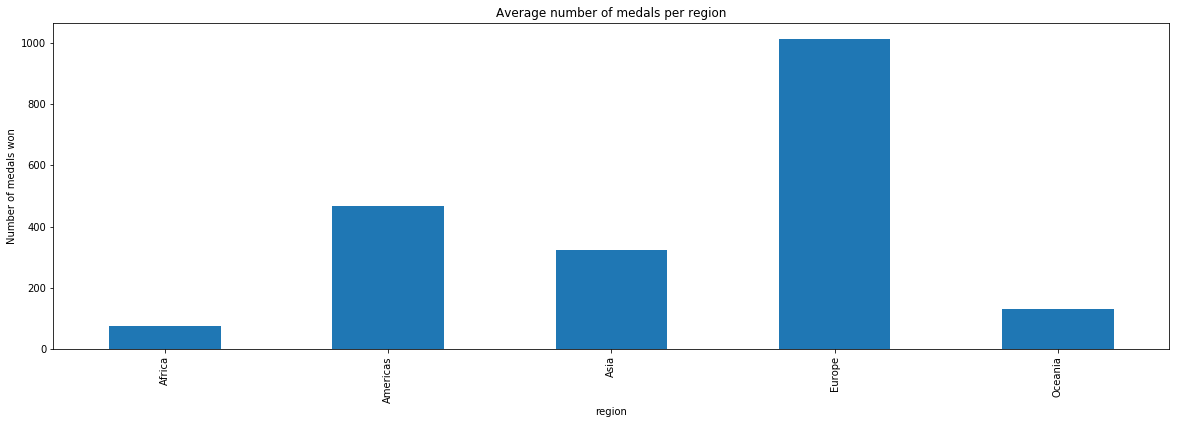

In [51]:
df_hw.groupby('region').medal.sum().plot(kind='bar', figsize=(20,6))
plt.title('Average number of medals per region')
plt.ylabel('Number of medals won')
plt.show()

# Europeans win more than 50 percent of all medals. 

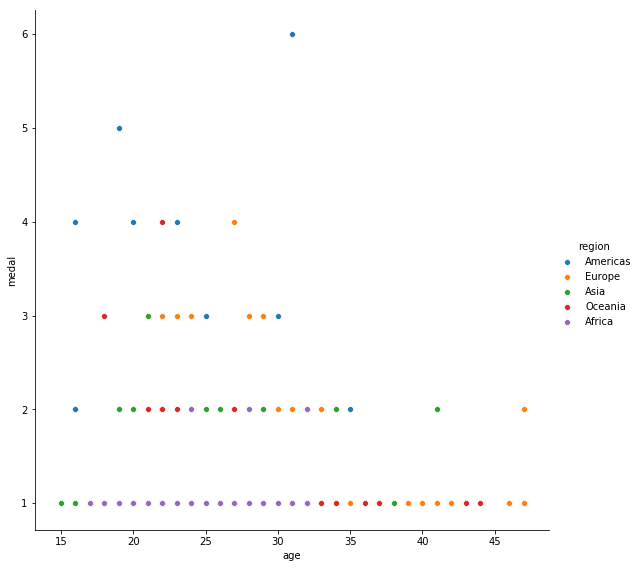

In [52]:
sns.pairplot(x_vars=['age'], y_vars=['medal'], data=df_hw, hue='region', height=8)
plt.show()

# Some interesting data here.
# Europeans dominate winning the medals above 40.
# Only Americans can win individually more than 4 medals.
# No African won more than 2 medals. And no African over age of 32 won a medal.

#Assignment Answers

####1. This was an attempt to explore the correlation between age and location of all the medal winners at the 2016 Olympics. There were some very interesting findings and they surely warrant further exploration. Even though Europeans dominated in winning the total amount of medals at the Olympics, Americans are capable to win more medals per individual. Due to time constraints, I was unable to dig dipper than this and I hope I was able to pique your interest!

####2. The most challenging part was not to mix up multiple dataframes that I was attempting to juggle in order to produce these results.

####3. How to manipulate data inside of dataframe and how to combine multiple dataframes.

####4. I think I will need to spend great deal of time on reading Pandas documentation. Often I find myself to know logically what I want my next step to be, but unable to express myself through code.

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.